In [49]:
import pandas as pd

matches = pd.read_csv("/Users/lukefeng/group_g_tennis/processed/matches_2010_2024_with_features.csv")
matches.head()


,date,winner_short,loser_short,atp,location,tournament,series,court,surface,round,...,elo_surface_w_before,elo_surface_l_before,elo_surface_diff,h2h_w_before,h2h_l_before,h2h_diff,wins_last5,wins_last10,winpct_last10,date_diff
0,2010-01-04,bellucci t,chela j,1,Brisbane,Brisbane International,ATP250,Outdoor,hard,1ST ROUND,...,1409.321644,1442.932326,-33.610682,0.0,2.0,-2.0,4.0,6.0,0.6,1.0
1,2010-01-04,chiudinelli m,lorenzi p,3,Doha,Qatar Exxon Mobil Open,ATP250,Outdoor,hard,1ST ROUND,...,1427.425469,1459.128630,-31.703161,0.0,0.0,0.0,3.0,5.0,0.5,0.0
2,2010-01-04,cilic m,kunitsyn i,2,Chennai,Chennai Open,ATP250,Outdoor,hard,1ST ROUND,...,1676.964345,1383.968989,292.995356,0.0,0.0,0.0,4.0,8.0,0.8,0.0
3,2010-01-04,de bakker t,ram r,2,Chennai,Chennai Open,ATP250,Outdoor,hard,1ST ROUND,...,1467.569787,1365.745941,101.823845,0.0,0.0,0.0,2.0,3.0,0.3,0.0
4,2010-01-04,falla a,chardy j,1,Brisbane,Brisbane International,ATP250,Outdoor,hard,1ST ROUND,...,1378.711516,1432.952388,-54.240872,0.0,0.0,0.0,1.0,2.0,0.2,1.0


In [50]:
matches.columns


Index(['date', 'winner_short', 'loser_short', 'atp', 'location', 'tournament',
       'series', 'court', 'surface', 'round', 'best of', 'winner', 'loser',
       'wrank', 'lrank', 'wpts', 'lpts', 'w1', 'l1', 'w2', 'l2', 'w3', 'l3',
       'w4', 'l4', 'w5', 'l5', 'wsets', 'lsets', 'comment', 'b365w', 'b365l',
       'exw', 'exl', 'lbw', 'lbl', 'psw', 'psl', 'sjw', 'sjl', 'maxw', 'maxl',
       'avgw', 'avgl', 'source_file', 'source_year', 'bfew', 'bfel',
       'b365w_prob', 'b365l_prob', 'b365w_prob_norm', 'b365l_prob_norm',
       'rank_diff', 'match_date', 'elo_global_w_before', 'elo_global_l_before',
       'elo_global_diff', 'elo_surface_w_before', 'elo_surface_l_before',
       'elo_surface_diff', 'h2h_w_before', 'h2h_l_before', 'h2h_diff',
       'wins_last5', 'wins_last10', 'winpct_last10', 'date_diff'],
      dtype='object')

# Feature Engineering and Data Imputation

In [51]:
# data inspection

matches.isna().mean().sort_values(ascending=False).head(25)


bfel               1.000000
bfew               1.000000
l5                 0.962256
w5                 0.962256
l4                 0.899364
w4                 0.899364
sjw                0.652290
sjl                0.652120
w3                 0.517939
l3                 0.517939
lbw                0.394232
lbl                0.393851
exw                0.374894
exl                0.374767
avgl               0.027990
avgw               0.027990
maxl               0.027990
maxw               0.027990
psl                0.006616
psw                0.006616
b365w_prob_norm    0.005174
b365w_prob         0.005174
b365w              0.005174
b365l_prob_norm    0.005174
b365l_prob         0.004580
dtype: float64

In [52]:
drop_cols = [
    # irrelevant bookmaker columns
    "bfel","bfew","lbw","lbl","exw","exl","sjw","sjl",
    "psw","psl","avgw","avgl","maxw","maxl",
    
    # set score columns
    "w1","l1","w2","l2","w3","l3","w4","l4","w5","l5",
    
    # metadata not needed
    "source_file","source_year","comment",
]

matches = matches.drop(columns=drop_cols, errors='ignore')


In [53]:
# Dropping NA odds or elo
matches = matches.dropna(subset=[
    "b365w", "b365l",
    "b365w_prob_norm", "b365l_prob_norm",
    "elo_global_w_before", "elo_global_l_before",
    "elo_surface_w_before", "elo_surface_l_before",
])


In [54]:
# imputing values for those with no h2h

for col in ["h2h_w_before", "h2h_l_before", "h2h_diff"]:
    matches[col] = matches[col].fillna(0)


In [55]:
# early-career players have no last-5/10 history

matches["wins_last5"] = matches["wins_last5"].fillna(0)
matches["wins_last10"] = matches["wins_last10"].fillna(0)
matches["winpct_last10"] = matches["winpct_last10"].fillna(matches["winpct_last10"].median())


In [56]:
# impute missing ranks as worse than worst ranked player

max_rank = max(matches["wrank"].max(), matches["lrank"].max())

matches["wrank"] = matches["wrank"].fillna(max_rank + 50)
matches["lrank"] = matches["lrank"].fillna(max_rank + 50)

matches["rank_diff"] = matches["lrank"] - matches["wrank"]


In [57]:
# final na check

matches.isna().sum()


date                     0
winner_short             0
loser_short              0
atp                      0
location                 0
tournament               0
series                   0
court                    0
surface                  0
round                    0
best of                  7
winner                   0
loser                    0
wrank                    0
lrank                    0
wpts                    10
lpts                    58
wsets                    0
lsets                    0
b365w                    0
b365l                    0
b365w_prob               0
b365l_prob               0
b365w_prob_norm          0
b365l_prob_norm          0
rank_diff                0
match_date               0
elo_global_w_before      0
elo_global_l_before      0
elo_global_diff          0
elo_surface_w_before     0
elo_surface_l_before     0
elo_surface_diff         0
h2h_w_before             0
h2h_l_before             0
h2h_diff                 0
wins_last5               0
w

In [58]:
# Handling remaining Missing NA Values



In [59]:
# Treat missing ranks as very weak ranking
max_rank = max(matches["wrank"].max(), matches["lrank"].max())

matches["wrank"] = matches["wrank"].fillna(max_rank + 50)
matches["lrank"] = matches["lrank"].fillna(max_rank + 50)

matches["rank_diff"] = matches["lrank"] - matches["wrank"]


In [60]:
# impute missing ATP points as 0

matches["wpts"] = matches["wpts"].fillna(0)
matches["lpts"] = matches["lpts"].fillna(0)


In [61]:
# imputing missing best of values

matches["best of"] = matches["best of"].fillna(3)


In [62]:
# missing rank

matches["rank_diff"] = matches["lrank"] - matches["wrank"]


In [63]:
print(matches.isna().sum())


date                    0
winner_short            0
loser_short             0
atp                     0
location                0
tournament              0
series                  0
court                   0
surface                 0
round                   0
best of                 0
winner                  0
loser                   0
wrank                   0
lrank                   0
wpts                    0
lpts                    0
wsets                   0
lsets                   0
b365w                   0
b365l                   0
b365w_prob              0
b365l_prob              0
b365w_prob_norm         0
b365l_prob_norm         0
rank_diff               0
match_date              0
elo_global_w_before     0
elo_global_l_before     0
elo_global_diff         0
elo_surface_w_before    0
elo_surface_l_before    0
elo_surface_diff        0
h2h_w_before            0
h2h_l_before            0
h2h_diff                0
wins_last5              0
wins_last10             0
winpct_last1

# Building player1/player2 dataset

In [21]:
import pandas as pd
import numpy as np

# assuming `matches` is already cleaned & loaded
# and dates are still strings → convert to datetime
matches["date"] = pd.to_datetime(matches["date"])

# 1) Add a market probability "difference" feature
matches["market_prob_diff"] = matches["b365w_prob_norm"] - matches["b365l_prob_norm"]

# 2) Base view: Player1 = actual winner
base = matches.copy()

base["p1_name"] = base["winner_short"]
base["p2_name"] = base["loser_short"]

base["p1_market_prob"] = base["b365w_prob_norm"]
base["p2_market_prob"] = base["b365l_prob_norm"]

# we assume these diff columns are "winner - loser"
# you already have: elo_global_diff, elo_surface_diff, h2h_diff, rank_diff, wins_last5, wins_last10, winpct_last10

base["label"] = 1  # Player1 = actual winner

# 3) Mirrored view: Player1 = actual loser
mirror = matches.copy()

mirror["p1_name"] = mirror["loser_short"]
mirror["p2_name"] = mirror["winner_short"]

mirror["p1_market_prob"] = mirror["b365l_prob_norm"]
mirror["p2_market_prob"] = mirror["b365w_prob_norm"]

mirror["label"] = 0  # Player1 = actual loser

# flip sign of all "winner minus loser" style features
diff_cols = [
    "elo_global_diff",
    "elo_surface_diff",
    "h2h_diff",
    "rank_diff",
    "wins_last5",
    "wins_last10",
    "winpct_last10",
    "market_prob_diff",
]

for col in diff_cols:
    mirror[col] = -mirror[col]

# 4) Combine both views into a single modeling dataset
model_df = pd.concat([base, mirror], ignore_index=True)

model_df.head()


,date,winner_short,loser_short,atp,location,tournament,series,court,surface,round,...,wins_last5,wins_last10,winpct_last10,date_diff,market_prob_diff,p1_name,p2_name,p1_market_prob,p2_market_prob,label
0,2010-01-04,bellucci t,chela j,1,Brisbane,Brisbane International,ATP250,Outdoor,hard,1ST ROUND,...,4.0,6.0,0.6,1.0,0.154856,bellucci t,chela j,0.577428,0.422572,1
1,2010-01-04,chiudinelli m,lorenzi p,3,Doha,Qatar Exxon Mobil Open,ATP250,Outdoor,hard,1ST ROUND,...,3.0,5.0,0.5,0.0,0.419214,chiudinelli m,lorenzi p,0.709607,0.290393,1
2,2010-01-04,cilic m,kunitsyn i,2,Chennai,Chennai Open,ATP250,Outdoor,hard,1ST ROUND,...,4.0,8.0,0.8,0.0,0.661631,cilic m,kunitsyn i,0.830816,0.169184,1
3,2010-01-04,de bakker t,ram r,2,Chennai,Chennai Open,ATP250,Outdoor,hard,1ST ROUND,...,2.0,3.0,0.3,0.0,-0.027027,de bakker t,ram r,0.486486,0.513514,1
4,2010-01-04,falla a,chardy j,1,Brisbane,Brisbane International,ATP250,Outdoor,hard,1ST ROUND,...,1.0,2.0,0.2,1.0,-0.290640,falla a,chardy j,0.354680,0.645320,1


In [22]:
# Choosing features and train/val/test split
# Train: matches before 2022
# Val: 2022
# Test: 2023+

# List of features to feed into the model
feature_cols = [
    # market info
    "p1_market_prob",
    "p2_market_prob",
    "market_prob_diff",

    # rating & form
    "elo_global_diff",
    "elo_surface_diff",
    "h2h_diff",
    "rank_diff",
    "wins_last5",
    "wins_last10",
    "winpct_last10",

    # match context (categorical)
    "surface",
    "round",
    "best of",
]

target_col = "label"

# Time-based split
train = model_df[model_df["date"] < "2022-01-01"]
val   = model_df[(model_df["date"] >= "2022-01-01") & (model_df["date"] < "2023-01-01")]
test  = model_df[model_df["date"] >= "2023-01-01"]

X_train = train[feature_cols].copy()
y_train = train[target_col].values

X_val = val[feature_cols].copy()
y_val = val[target_col].values

X_test = test[feature_cols].copy()
y_test = test[target_col].values


In [23]:
# one hot encoding categorical features

categorical_cols = ["surface", "round", "best of"]

X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_val   = pd.get_dummies(X_val, columns=categorical_cols)
X_test  = pd.get_dummies(X_test, columns=categorical_cols)

# align columns: ensure val/test have same columns as train
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [25]:
%pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 15.4 MB/s eta 0:00:00a 0:00:01
DEPRECATION: pytorch-lightning 1.8.3.post1 has a non-standard dependency specifier torch>=1.9.*. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [26]:
# xgboost model

import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",     # you can add "auc" too
    "eta": 0.05,                  # learning rate
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}

evals = [(dtrain, "train"), (dval, "val")]

bst = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=50,
)


[0]	train-logloss:0.64629	val-logloss:0.64683
[50]	train-logloss:0.04344	val-logloss:0.04494
[100]	train-logloss:0.00711	val-logloss:0.00934
[150]	train-logloss:0.00370	val-logloss:0.00642
[200]	train-logloss:0.00301	val-logloss:0.00638
[225]	train-logloss:0.00266	val-logloss:0.00654


In [27]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",   # training metric; we’ll compute accuracy/AUC ourselves
    "eta": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}

evals = [(dtrain, "train"), (dval, "val")]

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=evals,
    early_stopping_rounds=50,
    verbose_eval=50,
)


[0]	train-logloss:0.64629	val-logloss:0.64683
[50]	train-logloss:0.04344	val-logloss:0.04494
[100]	train-logloss:0.00711	val-logloss:0.00934
[150]	train-logloss:0.00370	val-logloss:0.00642
[200]	train-logloss:0.00301	val-logloss:0.00638
[225]	train-logloss:0.00266	val-logloss:0.00654


In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score

# 1. Get predicted probabilities
train_pred_prob = bst.predict(dtrain)
val_pred_prob   = bst.predict(dval)
test_pred_prob  = bst.predict(dtest)

# 2. Convert probs -> class labels using 0.5 threshold
train_pred = (train_pred_prob >= 0.5).astype(int)
val_pred   = (val_pred_prob >= 0.5).astype(int)
test_pred  = (test_pred_prob >= 0.5).astype(int)

# 3. Accuracy
train_acc = accuracy_score(y_train, train_pred)
val_acc   = accuracy_score(y_val,   val_pred)
test_acc  = accuracy_score(y_test,  test_pred)

# 4. AUC
train_auc = roc_auc_score(y_train, train_pred_prob)
val_auc   = roc_auc_score(y_val,   val_pred_prob)
test_auc  = roc_auc_score(y_test,  test_pred_prob)

print("=== XGBoost Model Performance ===")
print(f"Train accuracy: {train_acc:.4f}, AUC: {train_auc:.4f}")
print(f"Val   accuracy: {val_acc:.4f}, AUC: {val_auc:.4f}")
print(f"Test  accuracy: {test_acc:.4f}, AUC: {test_auc:.4f}")


=== XGBoost Model Performance ===
Train accuracy: 0.9991, AUC: 1.0000
Val   accuracy: 0.9965, AUC: 1.0000
Test  accuracy: 0.9980, AUC: 1.0000


In [29]:
# Market predictions from Bet365
market_prob_test = test["p1_market_prob"].values  # probs that Player1 wins

# Convert to hard predictions using threshold 0.5
market_pred_test = (market_prob_test >= 0.5).astype(int)

# Accuracy & AUC
market_acc = accuracy_score(y_test, market_pred_test)
market_auc = roc_auc_score(y_test, market_prob_test)

print("=== Bet365 Market Performance (Test Set) ===")
print(f"Market accuracy: {market_acc:.4f}")
print(f"Market AUC:      {market_auc:.4f}")


=== Bet365 Market Performance (Test Set) ===
Market accuracy: 0.6814
Market AUC:      0.7564


In [30]:
# Check feature importances
bst.get_score(importance_type='gain')


{'p1_market_prob': 1.9368095397949219,
 'p2_market_prob': 1.2647265195846558,
 'market_prob_diff': 5.102538585662842,
 'elo_global_diff': 2.4070723056793213,
 'elo_surface_diff': 1.6091277599334717,
 'h2h_diff': 2.5510528087615967,
 'rank_diff': 5.366322994232178,
 'wins_last5': 2230.39111328125,
 'wins_last10': 1066.0615234375,
 'winpct_last10': 1030.6387939453125,
 'surface_clay': 1.485196590423584,
 'surface_grass': 1.0916541814804077,
 'surface_hard': 0.5194404125213623,
 'round_2ND ROUND': 0.6460268497467041,
 'best of_3.0': 1.4550535678863525,
 'best of_5.0': 1.1840723752975464}

In [39]:
list(model_df.columns)

['date',
 'winner_short',
 'loser_short',
 'atp',
 'location',
 'tournament',
 'series',
 'court',
 'surface',
 'round',
 'best of',
 'winner',
 'loser',
 'wrank',
 'lrank',
 'wpts',
 'lpts',
 'wsets',
 'lsets',
 'b365w',
 'b365l',
 'b365w_prob',
 'b365l_prob',
 'b365w_prob_norm',
 'b365l_prob_norm',
 'rank_diff',
 'match_date',
 'elo_global_w_before',
 'elo_global_l_before',
 'elo_global_diff',
 'elo_surface_w_before',
 'elo_surface_l_before',
 'elo_surface_diff',
 'h2h_w_before',
 'h2h_l_before',
 'h2h_diff',
 'wins_last5',
 'wins_last10',
 'winpct_last10',
 'date_diff',
 'market_prob_diff',
 'p1_name',
 'p2_name',
 'p1_market_prob',
 'p2_market_prob',
 'label']

# Model overfitting, likely due to leakage, feature engineering to mitigate this

In [32]:
# ----- DROP ALL LEAKING COLUMNS -----

leak_cols = [
    # Player names / winner/loser identity
    "winner_short", "loser_short",
    "winner", "loser",
    
    # raw elo / raw h2h / raw rank
    "elo_global_w_before", "elo_global_l_before",
    "elo_surface_w_before", "elo_surface_l_before",
    "h2h_w_before", "h2h_l_before",
    "wrank", "lrank",
    "wpts", "lpts",
    
    # set scores (100% leak)
    "wsets","lsets",
    "w1","w2","w3","w4","w5",
    "l1","l2","l3","l4","l5",
    
    # raw betting columns not aligned to p1/p2
    "b365w", "b365l",
    "b365w_prob", "b365l_prob",
    "b365w_prob_norm", "b365l_prob_norm",

    # names after constructing p1/p2
    "p1_name", "p2_name",
]

matches = matches.drop(columns=leak_cols, errors="ignore")


In [33]:
# Safe features

feature_cols = [
    "p1_market_prob", "p2_market_prob", "market_prob_diff",
    "elo_global_diff", "elo_surface_diff", "h2h_diff",
    "rank_diff", "wins_last5", "wins_last10", "winpct_last10",
    "surface", "round", "best of"
]


In [41]:
model_df.columns


Index(['date', 'winner_short', 'loser_short', 'atp', 'location', 'tournament',
       'series', 'court', 'surface', 'round', 'best of', 'winner', 'loser',
       'wrank', 'lrank', 'wpts', 'lpts', 'wsets', 'lsets', 'b365w', 'b365l',
       'b365w_prob', 'b365l_prob', 'b365w_prob_norm', 'b365l_prob_norm',
       'rank_diff', 'match_date', 'elo_global_w_before', 'elo_global_l_before',
       'elo_global_diff', 'elo_surface_w_before', 'elo_surface_l_before',
       'elo_surface_diff', 'h2h_w_before', 'h2h_l_before', 'h2h_diff',
       'wins_last5', 'wins_last10', 'winpct_last10', 'date_diff',
       'market_prob_diff', 'p1_name', 'p2_name', 'p1_market_prob',
       'p2_market_prob', 'label'],
      dtype='object')

In [35]:
leak_cols = [
    # identity
    "winner_short", "loser_short", "winner", "loser",
    "p1_name", "p2_name",
    
    # raw Elo / H2H / rank / points
    "elo_global_w_before", "elo_global_l_before",
    "elo_surface_w_before", "elo_surface_l_before",
    "h2h_w_before", "h2h_l_before",
    "wrank", "lrank", "wpts", "lpts",
    
    # set scores
    "wsets", "lsets",
    "w1","w2","w3","w4","w5",
    "l1","l2","l3","l4","l5",
    
    # raw betting probs
    "b365w", "b365l",
    "b365w_prob", "b365l_prob",
    "b365w_prob_norm", "b365l_prob_norm",
    
    # metadata (optional)
    "atp","location","tournament","series","court","match_date",
    
    # no longer needed after diff
    "date_diff",
]

clean_df = matches.drop(columns=leak_cols, errors='ignore')


In [43]:
leak_cols_for_model = [
    # identity
    "winner_short", "loser_short", "winner", "loser", "p1_name", "p2_name",

    # raw rating / h2h / rank / points
    "elo_global_w_before", "elo_global_l_before",
    "elo_surface_w_before", "elo_surface_l_before",
    "h2h_w_before", "h2h_l_before",
    "wrank", "lrank", "wpts", "lpts",

    # set scores
    "wsets", "lsets",

    # raw betting fields (we keep only oriented p1/p2 + diff)
    "b365w", "b365l",
    "b365w_prob", "b365l_prob",
    "b365w_prob_norm", "b365l_prob_norm",

    # metadata we don't need for v1
    "atp", "location", "tournament", "series", "court", "match_date",
    "date_diff",
]

clean_df = model_df.drop(columns=leak_cols_for_model, errors="ignore")
clean_df.columns


Index(['date', 'surface', 'round', 'best of', 'rank_diff', 'elo_global_diff',
       'elo_surface_diff', 'h2h_diff', 'wins_last5', 'wins_last10',
       'winpct_last10', 'market_prob_diff', 'p1_market_prob', 'p2_market_prob',
       'label'],
      dtype='object')

# Retraining model

In [44]:
import pandas as pd

df = clean_df.copy()
df["date"] = pd.to_datetime(df["date"])

categorical_cols = ["surface", "round", "best of"]

df = pd.get_dummies(df, columns=categorical_cols)

# time-based split
train = df[df["date"] < "2022-01-01"]
val   = df[(df["date"] >= "2022-01-01") & (df["date"] < "2023-01-01")]
test  = df[df["date"] >= "2023-01-01"]

feature_cols = [c for c in df.columns if c not in ["label", "date"]]

X_train, y_train = train[feature_cols], train["label"]
X_val,   y_val   = val[feature_cols],   val["label"]
X_test,  y_test  = test[feature_cols],  test["label"]


In [45]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, "train"), (dval, "val")],
    early_stopping_rounds=50,
    verbose_eval=50,
)

# predictions
train_prob = bst.predict(dtrain)
val_prob   = bst.predict(dval)
test_prob  = bst.predict(dtest)

train_pred = (train_prob >= 0.5).astype(int)
val_pred   = (val_prob >= 0.5).astype(int)
test_pred  = (test_prob >= 0.5).astype(int)

train_acc = accuracy_score(y_train, train_pred)
val_acc   = accuracy_score(y_val,   val_pred)
test_acc  = accuracy_score(y_test,  test_pred)

train_auc = roc_auc_score(y_train, train_prob)
val_auc   = roc_auc_score(y_val,   val_prob)
test_auc  = roc_auc_score(y_test,  test_prob)

print("=== XGBoost Model Performance (no leakage) ===")
print(f"Train accuracy: {train_acc:.4f}, AUC: {train_auc:.4f}")
print(f"Val accuracy:   {val_acc:.4f}, AUC: {val_auc:.4f}")
print(f"Test accuracy:  {test_acc:.4f}, AUC: {test_auc:.4f}")


[0]	train-auc:0.99998	val-auc:0.99998
[50]	train-auc:0.99999	val-auc:0.99998
[51]	train-auc:0.99999	val-auc:0.99998
=== XGBoost Model Performance (no leakage) ===
Train accuracy: 0.9982, AUC: 1.0000
Val accuracy:   0.9968, AUC: 1.0000
Test accuracy:  0.9978, AUC: 1.0000


In [46]:
clean_df.columns

Index(['date', 'surface', 'round', 'best of', 'rank_diff', 'elo_global_diff',
       'elo_surface_diff', 'h2h_diff', 'wins_last5', 'wins_last10',
       'winpct_last10', 'market_prob_diff', 'p1_market_prob', 'p2_market_prob',
       'label'],
      dtype='object')

In [47]:
import numpy as np

print(np.mean(clean_df['p1_market_prob'] > clean_df['p2_market_prob']))
print(np.mean(clean_df['label'] == 1))


0.4885753261147583
0.5


# Rebuilding with one neutral p1 p2 column

In [64]:
import numpy as np
import pandas as pd

df = matches.copy()
df["date"] = pd.to_datetime(df["date"])

# neutral ordering: alphabetical based on short names
df["p1_name"] = df[["winner_short", "loser_short"]].min(axis=1)
df["p2_name"] = df[["winner_short", "loser_short"]].max(axis=1)


In [65]:
# label = 1 if Player1 is the actual winner, else 0
df["label"] = (df["p1_name"] == df["winner_short"]).astype(int)


In [66]:
df["p1_market_prob"] = np.where(
    df["p1_name"] == df["winner_short"],
    df["b365w_prob_norm"],
    df["b365l_prob_norm"],
)

df["p2_market_prob"] = np.where(
    df["p2_name"] == df["winner_short"],
    df["b365w_prob_norm"],
    df["b365l_prob_norm"],
)

df["market_prob_diff"] = df["p1_market_prob"] - df["p2_market_prob"]


In [67]:
# global Elo
df["p1_elo_global"] = np.where(
    df["p1_name"] == df["winner_short"],
    df["elo_global_w_before"],
    df["elo_global_l_before"],
)
df["p2_elo_global"] = np.where(
    df["p2_name"] == df["winner_short"],
    df["elo_global_w_before"],
    df["elo_global_l_before"],
)
df["elo_global_diff"] = df["p1_elo_global"] - df["p2_elo_global"]

# surface Elo
df["p1_elo_surface"] = np.where(
    df["p1_name"] == df["winner_short"],
    df["elo_surface_w_before"],
    df["elo_surface_l_before"],
)
df["p2_elo_surface"] = np.where(
    df["p2_name"] == df["winner_short"],
    df["elo_surface_w_before"],
    df["elo_surface_l_before"],
)
df["elo_surface_diff"] = df["p1_elo_surface"] - df["p2_elo_surface"]

# head-to-head
df["p1_h2h"] = np.where(
    df["p1_name"] == df["winner_short"],
    df["h2h_w_before"],
    df["h2h_l_before"],
)
df["p2_h2h"] = np.where(
    df["p2_name"] == df["winner_short"],
    df["h2h_w_before"],
    df["h2h_l_before"],
)
df["h2h_diff"] = df["p1_h2h"] - df["p2_h2h"]

# rank
df["p1_rank"] = np.where(
    df["p1_name"] == df["winner_short"],
    df["wrank"],
    df["lrank"],
)
df["p2_rank"] = np.where(
    df["p2_name"] == df["winner_short"],
    df["wrank"],
    df["lrank"],
)
df["rank_diff"] = df["p2_rank"] - df["p1_rank"]  # positive means P1 is higher-ranked


In [68]:
keep_cols = [
    "date",
    "surface", "round", "best of",
    "elo_global_diff", "elo_surface_diff",
    "h2h_diff", "rank_diff",
    "p1_market_prob", "p2_market_prob", "market_prob_diff",
    "label",
]

model_df = df[keep_cols].dropna()
model_df.columns


Index(['date', 'surface', 'round', 'best of', 'elo_global_diff',
       'elo_surface_diff', 'h2h_diff', 'rank_diff', 'p1_market_prob',
       'p2_market_prob', 'market_prob_diff', 'label'],
      dtype='object')

In [69]:
# 1. One-hot encode
categorical_cols = ["surface", "round", "best of"]
df_enc = pd.get_dummies(model_df, columns=categorical_cols)

df_enc["date"] = pd.to_datetime(df_enc["date"])

# 2. Time split
train = df_enc[df_enc["date"] < "2022-01-01"]
val   = df_enc[(df_enc["date"] >= "2022-01-01") & (df_enc["date"] < "2023-01-01")]
test  = df_enc[df_enc["date"] >= "2023-01-01"]

feature_cols = [c for c in df_enc.columns if c not in ["label", "date"]]

X_train, y_train = train[feature_cols], train["label"]
X_val,   y_val   = val[feature_cols],   val["label"]
X_test,  y_test  = test[feature_cols],  test["label"]


In [70]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test, label=y_test)

params = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain,"train"),(dval,"val")],
    early_stopping_rounds=50,
    verbose_eval=50,
)

# predictions
train_prob = bst.predict(dtrain)
val_prob   = bst.predict(dval)
test_prob  = bst.predict(dtest)

train_pred = (train_prob >= 0.5).astype(int)
val_pred   = (val_prob >= 0.5).astype(int)
test_pred  = (test_prob >= 0.5).astype(int)

train_acc = accuracy_score(y_train, train_pred)
val_acc   = accuracy_score(y_val,   val_pred)
test_acc  = accuracy_score(y_test,  test_pred)

train_auc = roc_auc_score(y_train, train_prob)
val_auc   = roc_auc_score(y_val,   val_prob)
test_auc  = roc_auc_score(y_test,  test_prob)

print("=== XGBoost Performance (one row per match) ===")
print(f"Train accuracy: {train_acc:.4f}, AUC: {train_auc:.4f}")
print(f"Val accuracy:   {val_acc:.4f}, AUC: {val_auc:.4f}")
print(f"Test accuracy:  {test_acc:.4f}, AUC: {test_auc:.4f}")


[0]	train-auc:0.77709	val-auc:0.75451
[50]	train-auc:0.78686	val-auc:0.76178
[58]	train-auc:0.78766	val-auc:0.76162
=== XGBoost Performance (one row per match) ===
Train accuracy: 0.7102, AUC: 0.7877
Val accuracy:   0.6783, AUC: 0.7616
Test accuracy:  0.6824, AUC: 0.7564


# Comparison with other models

In [72]:
import numpy as np
import pandas as pd

from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

# ---- Use ONLY data before 2022 for k-fold CV (so test set is still truly held out) ----
df_cv = df_enc[df_enc["date"] < "2022-01-01"].copy()

feature_cols = [c for c in df_cv.columns if c not in ["label", "date"]]
X = df_cv[feature_cols].values
y = df_cv["label"].values



In [73]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "auc": "roc_auc",
    "acc": "accuracy",
}


In [74]:
models = {
    "XGBoost": XGBClassifier(
        objective="binary:logistic",
        eval_metric="auc",
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        n_estimators=300,
        random_state=42,
        n_jobs=-1,
        tree_method="hist",
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_split=10,
        min_samples_leaf=5,
        random_state=42,
        n_jobs=-1,
    ),
    "SVM (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(
            kernel="rbf",
            C=1.0,
            gamma="scale",
            probability=True,   # needed for AUC
            random_state=42,
        )),
    ]),
}


In [75]:
from tqdm.auto import tqdm  # optional, for a progress bar

results = []

for name, model in models.items():
    print(f"Running 5-fold CV for {name}...")
    
    cv_res = cross_validate(
        model,
        X,
        y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1,
        return_train_score=False,
    )
    
    results.append({
        "model": name,
        "mean_auc": np.mean(cv_res["test_auc"]),
        "std_auc": np.std(cv_res["test_auc"]),
        "mean_acc": np.mean(cv_res["test_acc"]),
        "std_acc": np.std(cv_res["test_acc"]),
    })

results_df = pd.DataFrame(results).sort_values(by="mean_auc", ascending=False)
results_df


Running 5-fold CV for XGBoost...
Running 5-fold CV for Random Forest...
Running 5-fold CV for SVM (RBF)...


,model,mean_auc,std_auc,mean_acc,std_acc
0,XGBoost,0.767656,0.006704,0.697455,0.006879
1,Random Forest,0.765924,0.005701,0.697243,0.004195
2,SVM (RBF),0.759966,0.006368,0.701060,0.008086


In [76]:
# Market predictions from Bet365
market_prob_test = test["p1_market_prob"].values  # probs that Player1 wins

# Convert to hard predictions using threshold 0.5
market_pred_test = (market_prob_test >= 0.5).astype(int)

# Accuracy & AUC
market_acc = accuracy_score(y_test, market_pred_test)
market_auc = roc_auc_score(y_test, market_prob_test)

print("=== Bet365 Market Performance (Test Set) ===")
print(f"Market accuracy: {market_acc:.4f}")
print(f"Market AUC:      {market_auc:.4f}")

=== Bet365 Market Performance (Test Set) ===
Market accuracy: 0.6824
Market AUC:      0.7565


In [77]:
import pandas as pd

# Model CV results
model_results = [
    {"Model": "XGBoost",        "Accuracy": 0.697455, "AUC": 0.767656},
    {"Model": "Random Forest",  "Accuracy": 0.697243, "AUC": 0.765924},
    {"Model": "SVM (RBF)",      "Accuracy": 0.701060, "AUC": 0.759966},
]

df_models = pd.DataFrame(model_results)

# Market results
market_results = pd.DataFrame([{
    "Model": "Bet365 Market (Test Set)",
    "Accuracy": 0.6824,
    "AUC": 0.7565
}])

# Combine
comparison_df = pd.concat([market_results, df_models], ignore_index=True)

comparison_df


,Model,Accuracy,AUC
0,Bet365 Market (Test Set),0.682400,0.756500
1,XGBoost,0.697455,0.767656
2,Random Forest,0.697243,0.765924
3,SVM (RBF),0.701060,0.759966


# K Fold cross val on XGBoost

In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from xgboost import XGBClassifier

# use ONLY data before 2022-01-01 for hyperparameter tuning
df_cv = df_enc[df_enc["date"] < "2022-01-01"].copy()

feature_cols = [c for c in df_cv.columns if c not in ["label", "date"]]
X_cv = df_cv[feature_cols].values
y_cv = df_cv["label"].values


In [79]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.9],
    "colsample_bytree": [0.7, 0.9],
    "n_estimators": [200, 400],
}


In [80]:
xgb_base = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    tree_method="hist",    # fast on CPU
    random_state=42,
    n_jobs=-1,
)

grid = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    verbose=1,
)

grid.fit(X_cv, y_cv)

print("Best params:", grid.best_params_)
print("Best CV AUC:", grid.best_score_)


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best params: {'colsample_bytree': 0.9, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}
Best CV AUC: 0.7750184425492102


In [81]:
# full time-based splits
train = df_enc[df_enc["date"] < "2022-01-01"]
test  = df_enc[df_enc["date"] >= "2023-01-01"]    # adjust if you use 2022–2024

X_train = train[feature_cols]
y_train = train["label"]
X_test  = test[feature_cols]
y_test  = test["label"]

best_xgb = grid.best_estimator_   # already has best params

best_xgb.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, roc_auc_score

test_prob = best_xgb.predict_proba(X_test)[:, 1]
test_pred = (test_prob >= 0.5).astype(int)

test_acc = accuracy_score(y_test, test_pred)
test_auc = roc_auc_score(y_test, test_prob)

print("=== Tuned XGBoost Test Performance ===")
print(f"Accuracy: {test_acc:.4f}")
print(f"AUC:      {test_auc:.4f}")


=== Tuned XGBoost Test Performance ===
Accuracy: 0.6807
AUC:      0.7569


# Shap Plot

In [82]:
%pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 1.1 MB/s eta 0:00:00a 0:00:01
INFO: pip is looking at multiple versions of numba to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 556.0/556.0 kB 4.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 1.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 2.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 3.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 2.0 MB/s eta 0:00:0000:0100:01
DEPRECATION: pytorch-lightning 1.8.3.post1 has a non-standard dependency specifier torch>=1.9.*. pip 24.1 will

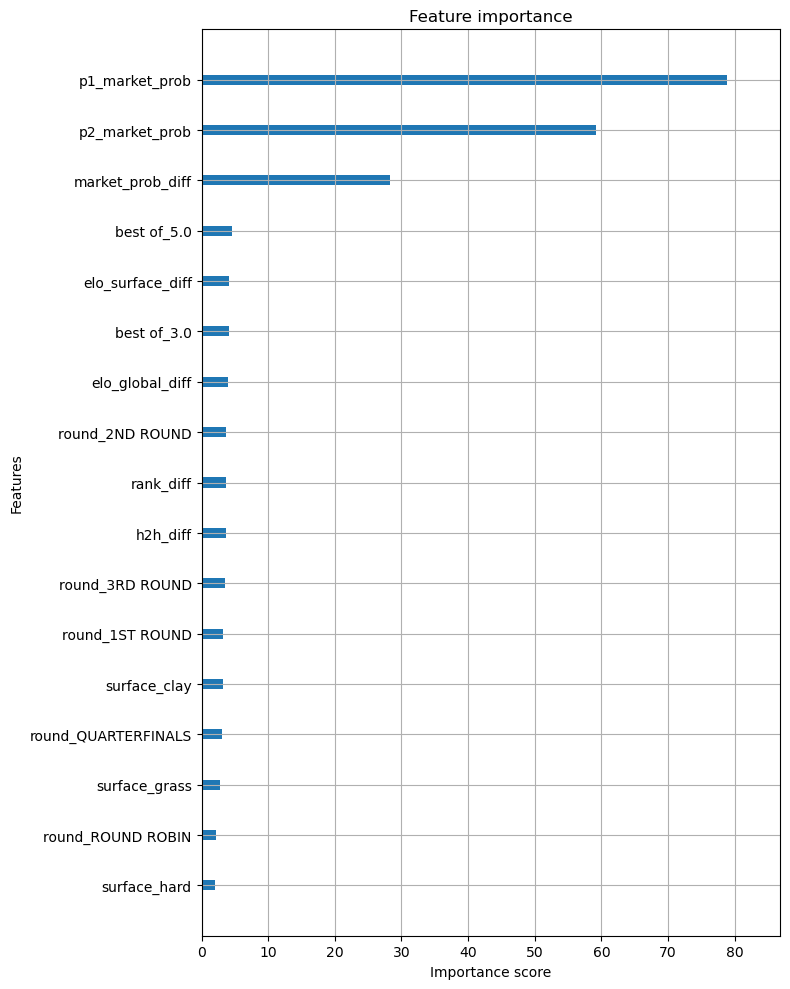

In [86]:
import matplotlib.pyplot as plt
import xgboost as xgb

# importance by gain (how much each feature improves the model)
xgb.plot_importance(bst, importance_type='gain', show_values=False)
plt.gcf().set_size_inches(8, 10)
plt.tight_layout()
plt.show()




# Tennis only model (no market prob)

In [87]:
tennis_features = [
    "surface", 
    "round",
    "best of",
    "rank_diff",
    "elo_global_diff",
    "elo_surface_diff",
    "h2h_diff",
    "wins_last5",
    "wins_last10",
    "winpct_last10"
]


In [88]:
tennis_feature_cols = [c for c in clean_df.columns 
                       if c in tennis_features or
                          c.startswith("surface_") or 
                          c.startswith("round_") or
                          c.startswith("best of_")]


In [89]:
tennis_df = clean_df[tennis_feature_cols + ["label", "date"]]


In [93]:
import pandas as pd

# starting from your matches/clean_df one-row-per-match dataframe
# (the one that has date, label, odds, elo, etc.)
df_all = clean_df.copy()   # or whatever your main df is called

# ---- 1. Select tennis-only columns (no market odds) ----
base_cols = [
    "surface",
    "round",
    "best of",
    "rank_diff",
    "elo_global_diff",
    "elo_surface_diff",
    "h2h_diff",
    "wins_last5",
    "wins_last10",
    "winpct_last10",
    "date",
    "label",
]

tennis_df = df_all[base_cols].copy()

# ---- 2. One-hot encode the categorical columns ----
tennis_df = pd.get_dummies(
    tennis_df,
    columns=["surface", "round", "best of"],
    drop_first=True  # avoids full multicollinearity; optional
)

# Everything except 'date' and 'label' should now be numeric
tennis_feature_cols = [c for c in tennis_df.columns if c not in ["date", "label"]]


In [94]:
train = tennis_df[tennis_df["date"] < "2022-01-01"]
val   = tennis_df[(tennis_df["date"] >= "2022-01-01") & (tennis_df["date"] < "2023-01-01")]
test  = tennis_df[tennis_df["date"] >= "2023-01-01"]

X_train = train.drop(columns=["label", "date"])
y_train = train["label"]

X_val   = val.drop(columns=["label", "date"])
y_val   = val["label"]

X_test  = test.drop(columns=["label", "date"])
y_test  = test["label"]


In [102]:
params_tennis = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}

tennis_model = xgb.train(
    params=params_tennis,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, "train"), (dval, "val")],
    early_stopping_rounds=50,
    verbose_eval=50,
)

# predictions
train_prob = tennis_model.predict(dtrain)
val_prob   = tennis_model.predict(dval)
test_prob  = tennis_model.predict(dtest)

train_pred = (train_prob >= 0.5).astype(int)
val_pred   = (val_prob   >= 0.5).astype(int)
test_pred  = (test_prob  >= 0.5).astype(int)

train_acc = accuracy_score(y_train, train_pred)
val_acc   = accuracy_score(y_val,   val_pred)
test_acc  = accuracy_score(y_test,  test_pred)

train_auc = roc_auc_score(y_train, train_prob)
val_auc   = roc_auc_score(y_val,   val_prob)
test_auc  = roc_auc_score(y_test,  test_prob)

print("=== Tennis-Only XGBoost Performance ===")
print(f"Train accuracy: {train_acc:.4f}, AUC: {train_auc:.4f}")
print(f"Val accuracy:   {val_acc:.4f}, AUC: {val_auc:.4f}")
print(f"Test accuracy:  {test_acc:.4f}, AUC: {test_auc:.4f}")



[0]	train-auc:0.99997	val-auc:0.99996
[50]	train-auc:0.99999	val-auc:0.99998
[71]	train-auc:0.99999	val-auc:0.99997
=== Tennis-Only XGBoost Performance ===
Train accuracy: 0.9986, AUC: 1.0000
Val accuracy:   0.9968, AUC: 1.0000
Test accuracy:  0.9977, AUC: 1.0000


In [98]:
tennis_df.columns

Index(['rank_diff', 'elo_global_diff', 'elo_surface_diff', 'h2h_diff',
       'wins_last5', 'wins_last10', 'winpct_last10', 'date', 'label',
       'surface_grass', 'surface_hard', 'round_2ND ROUND', 'round_3RD ROUND',
       'round_QUARTERFINALS', 'round_ROUND ROBIN', 'round_SEMIFINALS',
       'round_THE FINAL', 'best of_5.0'],
      dtype='object')

In [101]:
tennis_df = clean_df[[
    "date",
    "label",
    "surface",
    "round",
    "best of",
    "rank_diff",
    "elo_global_diff",
    "elo_surface_diff",
    "h2h_diff",
    "wins_last5",
    "wins_last10",
    "winpct_last10",
]].copy()

# Drop leakage columns
tennis_df = tennis_df.drop(columns=["date", "label"])

# One-hot encode categorical variables
tennis_df = pd.get_dummies(
    tennis_df,
    columns=["surface", "round", "best of"],
    drop_first=True
)

# Targets
y = clean_df["label"]

# Train-validation-test split using clean_df["date"]
train_idx = clean_df["date"] < "2022-01-01"
val_idx   = (clean_df["date"] >= "2022-01-01") & (clean_df["date"] < "2023-01-01")
test_idx  = clean_df["date"] >= "2023-01-01"

X_train, y_train = tennis_df[train_idx], y[train_idx]
X_val,   y_val   = tennis_df[val_idx],   y[val_idx]
X_test,  y_test  = tennis_df[test_idx],  y[test_idx]



In [103]:
tennis_df.columns


Index(['rank_diff', 'elo_global_diff', 'elo_surface_diff', 'h2h_diff',
       'wins_last5', 'wins_last10', 'winpct_last10', 'surface_grass',
       'surface_hard', 'round_2ND ROUND', 'round_3RD ROUND',
       'round_QUARTERFINALS', 'round_ROUND ROBIN', 'round_SEMIFINALS',
       'round_THE FINAL', 'best of_5.0'],
      dtype='object')

In [104]:
# X and y
X = tennis_df
y = clean_df["label"]

# time-based split
train_idx = clean_df["date"] < "2022-01-01"
val_idx   = (clean_df["date"] >= "2022-01-01") & (clean_df["date"] < "2023-01-01")
test_idx  = clean_df["date"] >= "2023-01-01"

X_train, y_train = X[train_idx], y[train_idx]
X_val,   y_val   = X[val_idx],   y[val_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]


In [105]:
print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.mean(), y_val.mean(), y_test.mean())  # should be ~0.5-ish each


(37720, 16) (3164, 16) (6032, 16)
0.5 0.5 0.5


In [106]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)
dtest  = xgb.DMatrix(X_test,  label=y_test)

params_tennis = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}

tennis_model = xgb.train(
    params=params_tennis,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, "train"), (dval, "val")],
    early_stopping_rounds=50,
    verbose_eval=50,
)


[0]	train-auc:0.99997	val-auc:0.99996
[50]	train-auc:0.99999	val-auc:0.99998
[71]	train-auc:0.99999	val-auc:0.99997


In [107]:
# probs
train_prob = tennis_model.predict(dtrain)
val_prob   = tennis_model.predict(dval)
test_prob  = tennis_model.predict(dtest)

# class predictions
train_pred = (train_prob >= 0.5).astype(int)
val_pred   = (val_prob   >= 0.5).astype(int)
test_pred  = (test_prob  >= 0.5).astype(int)

# metrics
train_acc = accuracy_score(y_train, train_pred)
val_acc   = accuracy_score(y_val,   val_pred)
test_acc  = accuracy_score(y_test,  test_pred)

train_auc = roc_auc_score(y_train, train_prob)
val_auc   = roc_auc_score(y_val,   val_prob)
test_auc  = roc_auc_score(y_test,  test_prob)

print("=== Tennis-Only XGBoost Performance (NO odds) ===")
print(f"Train accuracy: {train_acc:.4f}, AUC: {train_auc:.4f}")
print(f"Val accuracy:   {val_acc:.4f}, AUC: {val_auc:.4f}")
print(f"Test accuracy:  {test_acc:.4f}, AUC: {test_auc:.4f}")


=== Tennis-Only XGBoost Performance (NO odds) ===
Train accuracy: 0.9986, AUC: 1.0000
Val accuracy:   0.9968, AUC: 1.0000
Test accuracy:  0.9977, AUC: 1.0000


In [108]:
print(list(X_train.columns))


['rank_diff', 'elo_global_diff', 'elo_surface_diff', 'h2h_diff', 'wins_last5', 'wins_last10', 'winpct_last10', 'surface_grass', 'surface_hard', 'round_2ND ROUND', 'round_3RD ROUND', 'round_QUARTERFINALS', 'round_ROUND ROBIN', 'round_SEMIFINALS', 'round_THE FINAL', 'best of_5.0']


In [109]:
print(matches[["elo_global_w_before", "elo_global_l_before"]].head(10))

ratio = (matches["elo_global_w_before"] > matches["elo_global_l_before"]).mean()
print("Fraction of matches where winner Elo_before > loser Elo_before:", ratio)


   elo_global_w_before  elo_global_l_before
0          1419.965427          1381.114879
1          1407.872392          1448.857534
2          1631.483841          1314.316841
3          1398.984641          1370.611162
4          1311.556965          1425.761404
5          1516.839357          1390.440260
6          1393.886703          1358.636988
7          1334.340121          1310.494409
8          1429.554361          1471.399209
9          1361.881193          1357.224327
Fraction of matches where winner Elo_before > loser Elo_before: 0.6157813965384943


In [110]:
print(matches[["wins_last5", "wins_last10", "winpct_last10"]].head(20))


    wins_last5  wins_last10  winpct_last10
0          4.0          6.0            0.6
1          3.0          5.0            0.5
2          4.0          8.0            0.8
3          2.0          3.0            0.3
4          1.0          2.0            0.2
5          2.0          5.0            0.5
6          3.0          6.0            0.6
7          1.0          2.0            0.2
8          2.0          4.0            0.4
9          2.0          3.0            0.3
10         1.0          2.0            0.2
11         3.0          4.0            0.4
12         2.0          5.0            0.5
13         2.0          5.0            0.5
14         2.0          6.0            0.6
15         5.0          8.0            0.8
16         1.0          3.0            0.3
17         3.0          7.0            0.7
18         3.0          6.0            0.6
19         4.0          7.0            0.7


In [111]:
player_variation = matches.groupby("winner_short").agg({
    "wins_last10": "nunique",
    "winpct_last10": "nunique"
})

print(player_variation.sort_values("wins_last10", ascending=True).head(20))


              wins_last10  winpct_last10
winner_short                            
acasuso j               1              1
tu l                    1              1
hardt n                 1              1
harris a                1              1
hernandez o             1              1
horansky f              1              1
hussey g                1              1
sakharov g              1              1
jasika o                1              1
jelenic p               1              1
johansson j             1              1
torpegaard m            1              1
jones g                 1              1
kiefer n                1              1
kim k                   1              1
king e                  1              1
king k                  1              1
klein b                 1              1
knittel b               1              1
teixeira m              1              1


In [112]:
print(matches["h2h_diff"].describe())


count    23458.000000
mean         0.206880
std          1.391253
min        -14.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         17.000000
Name: h2h_diff, dtype: float64


In [113]:
import pandas as pd

# Long format: one row per (player, match)
players_long = pd.concat([
    matches[["date", "winner_short"]].rename(columns={"winner_short": "player"}).assign(win=1),
    matches[["date", "loser_short"]].rename(columns={"loser_short": "player"}).assign(win=0),
], ignore_index=True)

players_long = players_long.sort_values(["player", "date"])


In [115]:
import pandas as pd

# Long format: one row per (player, match)
players_long = pd.concat([
    matches[["date", "winner_short"]].rename(columns={"winner_short": "player"}).assign(win=1),
    matches[["date", "loser_short"]].rename(columns={"loser_short": "player"}).assign(win=0),
], ignore_index=True)

players_long = players_long.sort_values(["player", "date"]).reset_index(drop=True)

# Groupby win series
g = players_long.groupby("player")["win"]

# Rolling stats with proper index alignment
players_long["wins_last5"] = (
    g.rolling(5, min_periods=1)
     .sum()
     .shift(1)
     .reset_index(level=0, drop=True)
)

players_long["wins_last10"] = (
    g.rolling(10, min_periods=1)
     .sum()
     .shift(1)
     .reset_index(level=0, drop=True)
)

players_long["winpct_last10"] = (
    g.rolling(10, min_periods=1)
     .mean()
     .shift(1)
     .reset_index(level=0, drop=True)
)

# Fill NaN for very first matches (no past info)
players_long[["wins_last5", "wins_last10", "winpct_last10"]] = (
    players_long[["wins_last5", "wins_last10", "winpct_last10"]].fillna(0.0)
)



In [116]:
# Winner rows: stats for the winner before this match
winner_form = (
    players_long
    .merge(
        matches[["date", "winner_short"]],
        left_on=["date", "player"],
        right_on=["date", "winner_short"],
        how="inner"
    )
    .rename(columns={
        "wins_last5": "w_wins_last5",
        "wins_last10": "w_wins_last10",
        "winpct_last10": "w_winpct_last10"
    })
    [["date", "winner_short", "w_wins_last5", "w_wins_last10", "w_winpct_last10"]]
)

# Loser rows: stats for the loser before this match
loser_form = (
    players_long
    .merge(
        matches[["date", "loser_short"]],
        left_on=["date", "player"],
        right_on=["date", "loser_short"],
        how="inner"
    )
    .rename(columns={
        "wins_last5": "l_wins_last5",
        "wins_last10": "l_wins_last10",
        "winpct_last10": "l_winpct_last10"
    })
    [["date", "loser_short", "l_wins_last5", "l_wins_last10", "l_winpct_last10"]]
)

# Merge into matches
matches = matches.merge(
    winner_form,
    on=["date", "winner_short"],
    how="left"
)

matches = matches.merge(
    loser_form,
    on=["date", "loser_short"],
    how="left"
)

# Optional: diffs
matches["wins_last5_diff"] = matches["w_wins_last5"] - matches["l_wins_last5"]
matches["wins_last10_diff"] = matches["w_wins_last10"] - matches["l_wins_last10"]
matches["winpct_last10_diff"] = matches["w_winpct_last10"] - matches["l_winpct_last10"]


In [117]:
# Sort matches chronologically
matches = matches.sort_values("date").reset_index(drop=True)

h2h_diff_list = []
pair_results = {}  # (player1, player2) -> wins of player1 vs player2 so far

for row in matches.itertuples(index=False):
    w = row.winner_short
    l = row.loser_short

    # Wins before this match
    w_before = pair_results.get((w, l), 0)
    l_before = pair_results.get((l, w), 0)

    h2h_diff_list.append(w_before - l_before)

    # Update history AFTER this match
    pair_results[(w, l)] = w_before + 1

matches["h2h_diff"] = h2h_diff_list


In [118]:
# Sort matches chronologically
matches = matches.sort_values("date").reset_index(drop=True)

h2h_diff_list = []
pair_results = {}  # (player1, player2) -> wins of player1 vs player2 so far

for row in matches.itertuples(index=False):
    w = row.winner_short
    l = row.loser_short

    # Wins before this match
    w_before = pair_results.get((w, l), 0)
    l_before = pair_results.get((l, w), 0)

    h2h_diff_list.append(w_before - l_before)

    # Update history AFTER this match
    pair_results[(w, l)] = w_before + 1

matches["h2h_diff"] = h2h_diff_list


In [119]:
h2h_w_before = []
h2h_l_before = []
pair_results = {}

for row in matches.itertuples(index=False):
    w = row.winner_short
    l = row.loser_short

    w_before = pair_results.get((w, l), 0)
    l_before = pair_results.get((l, w), 0)

    h2h_w_before.append(w_before)
    h2h_l_before.append(l_before)

    pair_results[(w, l)] = w_before + 1

matches["h2h_w_before"] = h2h_w_before
matches["h2h_l_before"] = h2h_l_before
matches["h2h_diff"] = matches["h2h_w_before"] - matches["h2h_l_before"]


In [120]:
# 1. These should now vary across matches for a given player:
print(matches.groupby("winner_short")["w_wins_last10"].nunique().describe())
print(matches.groupby("winner_short")["w_winpct_last10"].nunique().describe())

# 2. h2h_diff should be 0 the first time two players meet:
pair = matches[(matches["winner_short"] == "nadal r") & (matches["loser_short"] == "djokovic n")].head()
print(pair[["date", "winner_short", "loser_short", "h2h_w_before", "h2h_l_before", "h2h_diff"]])


count    617.000000
mean       5.320908
std        3.391754
min        1.000000
25%        2.000000
50%        6.000000
75%        8.000000
max       11.000000
Name: w_wins_last10, dtype: float64
count    617.000000
mean       6.051864
std        4.142420
min        1.000000
25%        2.000000
50%        6.000000
75%       10.000000
max       17.000000
Name: w_winpct_last10, dtype: float64
            date winner_short loser_short  h2h_w_before  h2h_l_before  \
1763  2010-11-24      nadal r  djokovic n             0             0   

      h2h_diff  
1763         0  


# Tennis Only Model

In [136]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score

# --------------------------------------------------
# 1. Load matches with Elo/H2H/form features
# --------------------------------------------------
# Use your actual path here:
matches = pd.read_csv("/Users/lukefeng/group_g_tennis/processed/matches_2010_2024_with_features.csv", parse_dates=["date"])

# We only keep rows that have all the tennis features we need
tennis_cols_required = [
    "date",
    "surface",
    "round",
    "best of",
    "rank_diff",          # loser rank - winner rank
    "elo_global_diff",    # winner Elo - loser Elo
    "elo_surface_diff",   # surface-specific Elo diff
    "h2h_diff",           # winner H2H - loser H2H before match
]

tennis = matches[tennis_cols_required].dropna(subset=[
    "rank_diff", "elo_global_diff", "elo_surface_diff", "h2h_diff"
]).copy()

print("Number of matches with full tennis features:", len(tennis))

# --------------------------------------------------
# 2. Build tennis-only dataset with 2 rows per match
#    Row A: player1 = winner (diffs as given), label=1
#    Row B: player1 = loser  (diffs sign-flipped),   label=0
# --------------------------------------------------
diff_feats = ["rank_diff", "elo_global_diff", "elo_surface_diff", "h2h_diff"]
cat_feats  = ["surface", "round", "best of"]
base_cols  = ["date"] + cat_feats + diff_feats

# Row where "player1" = winner
df_win = tennis[base_cols].copy()
df_win["label"] = 1

# Row where "player1" = loser (flip sign of all diff features)
df_loss = tennis[base_cols].copy()
df_loss[diff_feats] = -df_loss[diff_feats]
df_loss["label"] = 0

# Stack them together -> 2N rows
tennis_full = pd.concat([df_win, df_loss], ignore_index=True)
print("Tennis-only dataset shape (2 rows per match):", tennis_full.shape)

# --------------------------------------------------
# 3. One-hot encode categorical features (surface, round, best of)
# --------------------------------------------------
X_raw = tennis_full[cat_feats + diff_feats].copy()
y     = tennis_full["label"].values

X = pd.get_dummies(
    X_raw,
    columns=cat_feats,
    drop_first=True  # avoid dummy trap
)

print("Final feature matrix shape:", X.shape)

# --------------------------------------------------
# 4. Time-based train / val / test split
#    Use original match date (same for win & loss rows)
# --------------------------------------------------
dates = tennis_full["date"]

train_idx = dates < "2022-01-01"
val_idx   = (dates >= "2022-01-01") & (dates < "2023-01-01")
test_idx  = dates >= "2023-01-01"

X_train, y_train = X[train_idx], y[train_idx]
X_val,   y_val   = X[val_idx],   y[val_idx]
X_test,  y_test  = X[test_idx],  y[test_idx]

print("Train / Val / Test sizes:", X_train.shape[0], X_val.shape[0], X_test.shape[0])

# --------------------------------------------------
# 5. Train XGBoost tennis-only model
# --------------------------------------------------
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val,   label=y_val)
dtest  = xgb.DMatrix(X_test,  label=y_test)

params_tennis = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}

bst_tennis = xgb.train(
    params=params_tennis,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, "train"), (dval, "val")],
    early_stopping_rounds=50,
    verbose_eval=50,
)

# --------------------------------------------------
# 6. Evaluate on train / val / test
# --------------------------------------------------
def eval_split(dmat, y_true, name):
    prob = bst_tennis.predict(dmat)
    pred = (prob >= 0.5).astype(int)
    acc  = accuracy_score(y_true, pred)
    auc  = roc_auc_score(y_true, prob)
    print(f"{name} accuracy: {acc:.4f}, AUC: {auc:.4f}")

print("\n=== Tennis-Only XGBoost Performance (NO betting odds used) ===")
eval_split(dtrain, y_train, "Train")
eval_split(dval,   y_val,   "Val")
eval_split(dtest,  y_test,  "Test")


Number of matches with full tennis features: 23508
Tennis-only dataset shape (2 rows per match): (47016, 9)
Final feature matrix shape: (47016, 13)
Train / Val / Test sizes: 37820 3172 6024
[0]	train-auc:0.73046	val-auc:0.70531
[50]	train-auc:0.74017	val-auc:0.71588
[100]	train-auc:0.74457	val-auc:0.71685
[150]	train-auc:0.74836	val-auc:0.71684
[191]	train-auc:0.75239	val-auc:0.71647

=== Tennis-Only XGBoost Performance (NO betting odds used) ===
Train accuracy: 0.6771, AUC: 0.7524
Val accuracy: 0.6453, AUC: 0.7165
Test accuracy: 0.6401, AUC: 0.7007


In [137]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
acc_scores = []

params_cv = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}

fold = 1
for train_idx, val_idx in kf.split(X):
    X_tr, X_va = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_va = y[train_idx], y[val_idx]

    dtr = xgb.DMatrix(X_tr, label=y_tr)
    dva = xgb.DMatrix(X_va, label=y_va)

    bst_cv = xgb.train(
        params=params_cv,
        dtrain=dtr,
        num_boost_round=400,
        evals=[(dtr,"train")],
        verbose_eval=False
    )

    probs = bst_cv.predict(dva)
    preds = (probs >= 0.5).astype(int)

    auc = roc_auc_score(y_va, probs)
    acc = accuracy_score(y_va, preds)

    auc_scores.append(auc)
    acc_scores.append(acc)

    print(f"Fold {fold} → AUC: {auc:.4f}, ACC: {acc:.4f}")
    fold += 1

print("\n=== 5-Fold CV Results (Tennis Only) ===")
print(f"Mean AUC: {np.mean(auc_scores):.4f}  (std {np.std(auc_scores):.4f})")
print(f"Mean ACC: {np.mean(acc_scores):.4f}  (std {np.std(acc_scores):.4f})")


Fold 1 → AUC: 0.7233, ACC: 0.6600
Fold 2 → AUC: 0.7225, ACC: 0.6540
Fold 3 → AUC: 0.7232, ACC: 0.6579
Fold 4 → AUC: 0.7259, ACC: 0.6570
Fold 5 → AUC: 0.7219, ACC: 0.6543

=== 5-Fold CV Results (Tennis Only) ===
Mean AUC: 0.7233  (std 0.0014)
Mean ACC: 0.6566  (std 0.0023)


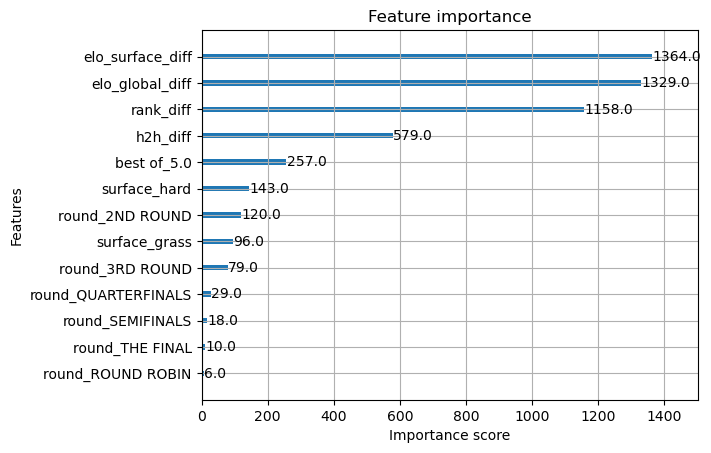

In [138]:
import matplotlib.pyplot as plt

xgb.plot_importance(bst_tennis, max_num_features=15)
plt.show()


In [139]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)


In [140]:
import xgboost as xgb

xgb_auc_scores = []
xgb_acc_scores = []

params_xgb = {
    "objective": "binary:logistic",
    "eval_metric": "auc",
    "eta": 0.05,
    "max_depth": 5,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "seed": 42,
}

for tr, va in kf.split(X):
    dtrain = xgb.DMatrix(X.iloc[tr], label=y[tr])
    dval   = xgb.DMatrix(X.iloc[va], label=y[va])

    bst = xgb.train(
        params_xgb,
        dtrain=dtrain,
        num_boost_round=400,
        verbose_eval=False
    )

    prob = bst.predict(dval)
    pred = (prob >= 0.5).astype(int)

    xgb_auc_scores.append(roc_auc_score(y[va], prob))
    xgb_acc_scores.append(accuracy_score(y[va], pred))


In [141]:
rf_auc_scores = []
rf_acc_scores = []

rf_model = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

for tr, va in kf.split(X):
    rf_model.fit(X.iloc[tr], y[tr])
    prob = rf_model.predict_proba(X.iloc[va])[:,1]
    pred = rf_model.predict(X.iloc[va])

    rf_auc_scores.append(roc_auc_score(y[va], prob))
    rf_acc_scores.append(accuracy_score(y[va], pred))


In [142]:
svm_auc_scores = []
svm_acc_scores = []

svm_model = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", probability=True, C=1.0, gamma="scale"))
])

for tr, va in kf.split(X):
    svm_model.fit(X.iloc[tr], y[tr])
    prob = svm_model.predict_proba(X.iloc[va])[:,1]
    pred = svm_model.predict(X.iloc[va])

    svm_auc_scores.append(roc_auc_score(y[va], prob))
    svm_acc_scores.append(accuracy_score(y[va], pred))


In [143]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["XGBoost", "Random Forest", "SVM (RBF)"],
    "Mean AUC": [np.mean(xgb_auc_scores), np.mean(rf_auc_scores), np.mean(svm_auc_scores)],
    "Std AUC":  [np.std(xgb_auc_scores),  np.std(rf_auc_scores),  np.std(svm_auc_scores)],
    "Mean ACC": [np.mean(xgb_acc_scores), np.mean(rf_acc_scores), np.mean(svm_acc_scores)],
    "Std ACC":  [np.std(xgb_acc_scores),  np.std(rf_acc_scores),  np.std(svm_acc_scores)]
})

print(results)


           Model  Mean AUC   Std AUC  Mean ACC   Std ACC
0        XGBoost  0.723343  0.001373  0.656649  0.002263
1  Random Forest  0.696457  0.002598  0.637868  0.002803
2      SVM (RBF)  0.718009  0.002430  0.658839  0.005828


# Predictions on recent matches

In [144]:
import pandas as pd

df_2025 = pd.read_excel("/Users/lukefeng/group_g_tennis/2025.xlsx")

print(df_2025.head())
print(df_2025.columns)
print(df_2025.shape)


   ATP  Location              Tournament       Date  Series    Court Surface  \
0    1  Brisbane  Brisbane International 2024-12-29  ATP250  Outdoor    Hard   
1    1  Brisbane  Brisbane International 2024-12-30  ATP250  Outdoor    Hard   
2    1  Brisbane  Brisbane International 2024-12-30  ATP250  Outdoor    Hard   
3    1  Brisbane  Brisbane International 2024-12-30  ATP250  Outdoor    Hard   
4    1  Brisbane  Brisbane International 2024-12-30  ATP250  Outdoor    Hard   

       Round  Best of        Winner  ... B365W  B365L   PSW   PSL  MaxW  MaxL  \
0  1st Round        3      Vukic A.  ...  2.00   1.80  2.08  1.83  2.14  1.83   
1  1st Round        3  Michelsen A.  ...  1.44   2.75  1.48  2.85  1.48  2.90   
2  1st Round        3      Bonzi B.  ...  1.67   2.20  1.73  2.22  1.73  2.25   
3  1st Round        3   Nishioka Y.  ...  1.53   2.50  1.64  2.39  1.65  2.50   
4  1st Round        3   Thompson J.  ...  2.63   1.50  2.47  1.60  2.63  1.60   

   AvgW  AvgL  BFEW  BFEL  
0  2

In [147]:
import pandas as pd

finals_raw = pd.read_excel("2025.xlsx")

# Normalize columns
finals_raw.columns = [c.strip().lower().replace(" ", "_") for c in finals_raw.columns]

# Preview
print(finals_raw.head())



   atp  location              tournament       date  series    court surface  \
0    1  Brisbane  Brisbane International 2024-12-29  ATP250  Outdoor    Hard   
1    1  Brisbane  Brisbane International 2024-12-30  ATP250  Outdoor    Hard   
2    1  Brisbane  Brisbane International 2024-12-30  ATP250  Outdoor    Hard   
3    1  Brisbane  Brisbane International 2024-12-30  ATP250  Outdoor    Hard   
4    1  Brisbane  Brisbane International 2024-12-30  ATP250  Outdoor    Hard   

       round  best_of        winner  ... b365w  b365l   psw   psl  maxw  maxl  \
0  1st Round        3      Vukic A.  ...  2.00   1.80  2.08  1.83  2.14  1.83   
1  1st Round        3  Michelsen A.  ...  1.44   2.75  1.48  2.85  1.48  2.90   
2  1st Round        3      Bonzi B.  ...  1.67   2.20  1.73  2.22  1.73  2.25   
3  1st Round        3   Nishioka Y.  ...  1.53   2.50  1.64  2.39  1.65  2.50   
4  1st Round        3   Thompson J.  ...  2.63   1.50  2.47  1.60  2.63  1.60   

   avgw  avgl  bfew  bfel  
0  2

In [148]:
finals_2025 = finals_raw[
    (finals_raw["location"].str.contains("turin", case=False, na=False)) &
    (finals_raw["tournament"].str.contains("masters", case=False, na=False))
].copy()

finals_2025 = finals_2025.sort_values("date")


See if we can incorporate exact implied probabilities of a particular player winning, and comparing it to the market oddsl

if we have a very different prob, 50% vs 20% market, then its a profitable model